# Introdução

A importância da previsão do tempo vai muito além de saber se é necessário sair de casa com o guarda-chuva e até mesmo se vestir de forma adequada, evitando morrer calor ou morrer de frio. A previsão do tempo é relevante para muitos outros aspectos, pois praticamente todas as nossas atividades dependem das condições climáticas, desde o dia a dia da população até mesmo as mais importantes atividades econômicas desenvolvidas no país, tais como, avaliar as condições da estrada para o uso dos meios de transportes, o turismo e até mesmo para a agricultura e abastecimento de água.  Além disso, os registros guardados podem servir como base para o estudo das variações climáticas ao longo do tempo. 
Os agricultores frequentemente fazem o plantio no início de um período de chuvas, pois as sementes precisam de água para germinar. Em contrapartida a previsão de enchentes, geadas ou de falta de chuvas pode evitar grandes prejuízos. 

O banco de dados aqui analisado foi retirado do site do Instituto Nacional de Meteorologia (INMET) e as informações são referentes à cidade de Macaé, localizada no interior do Estado  Rio de Janeiro, no período de janeiro de 2016 e janeiro de 2020. O banco de dados é composto por 18 variáveis e possui 35063 observações. As variáveis que constam nesse banco de dados são: 




*   Chuva: Variável resposta (Binária:Sim ou Não)
*   Precipitação Total: Deposição de água para a superfície da Terra, sob a forma de chuva, neve, gelo ou granizo(em milímetros);
*   Pressão Atmosférica: Peso que o ar exerce sobre a superfície terrestre (em milibares);
*   Pressão Atmosférica máxima na hora anterior(em milibares);
*   Pressão Atmosférica mínima na hora anterior(em milibares);
*   Radiação global: radiação solar (ondas curtas) que atinge a superfície do solo(KJ m^2 por dia);
*   Temperatura do ar(em graus Celsius);
*   Temperatura do ponto de orvalho: temperatura até a qual o ar deve ser resfriado para que o vapor de água presente condense na forma de orvalho ou geada (em graus Celsius);   
*   Temperatura máxima do ponto de orvalho(em graus Celsius);
*   Temperatura  mínima do ponto de orvalho(em graus Celsius);
*   Temperatura máxima na hora anterior (em graus Celsius);
*   Temperatura mínima na hora anterior (em graus Celsius);
*   Umidade relativa do ar: Relação entre a quantidade de água existente no ar e a quantidade máxima que poderia haver na mesma temperatura (em percentual);
*   Umidade relativa do ar máxima (em percentual);
*   Umidade relativa do ar mínima (em percentual);
*   Direção horária do vento  (em graus azimute);
*   Rajada máxima do vento (em m/s);
*   Velocidade horária do vento (em m/s).




























# Objetivo

Esta análise tem como objetivo a previsão de chuva na cidade de Macaé, através de variáveis que influenciam diretamente o clima. Utilizando como metodologia a técnica de redes neurais. 

In [ ]:
import pandas as pd # Manipulação de dataset
import numpy as np # Operações
import matplotlib.pyplot as plt # Gráfico
import seaborn as sns # Gráfico

from statsmodels.graphics import tsaplots # pacf

import datetime

#########################################
# Modelagem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping   
from keras.utils import plot_model
import tensorflow as tf



In [ ]:
# Função útil visualização

def ver(df, linhas = 3):
  saida = pd.concat([df.head(linhas), df.tail(linhas)])
  return saida

In [ ]:
base_total = {
  '2019': pd.read_csv(
  '/content/drive/My Drive/Colab Notebooks/INMET_SE_RJ_A608_MACAE_01-01-2019_A_31-12-2019.CSV',
  delimiter = ';', decimal = ',', encoding = 'latin1'),
  '2018': pd.read_csv(
  '/content/drive/My Drive/Colab Notebooks/INMET_SE_RJ_A608_MACAE_01-01-2018_A_31-12-2018.CSV',
  delimiter = ';', decimal = ',', encoding = 'latin1'),
  '2017': pd.read_csv(
  '/content/drive/My Drive/Colab Notebooks/INMET_SE_RJ_A608_MACAE_01-01-2017_A_31-12-2017.CSV',
  delimiter = ';', decimal = ',', encoding = 'latin1'),
  '2016': pd.read_csv(
  '/content/drive/My Drive/Colab Notebooks/INMET_SE_RJ_A608_MACAE_01-01-2016_A_31-12-2016.CSV',
  delimiter = ';', decimal = ',', encoding = 'latin1')
}


base_total['2018'].columns = base_total['2019'].columns
base_total['2017'].columns = base_total['2019'].columns
base_total['2016'].columns = base_total['2019'].columns

base = pd.concat(base_total).reset_index(drop = True).replace(-9999, np.nan)


ver(base)


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2019,0000 UTC,0.0,1009.8,1009.8,1009.2,NaN,24.7,23.3,25.1,24.6,23.4,23.1,92.0,90.0,92.0,324.0,3.2,1.0
1,01/01/2019,0100 UTC,0.0,1010.1,1010.1,1009.9,NaN,24.3,23.2,24.7,24.2,23.3,23.0,94.0,92.0,94.0,112.0,1.5,1.2
2,01/01/2019,0200 UTC,0.0,1009.7,1010.1,1009.7,NaN,23.9,22.7,24.4,23.9,23.3,22.7,94.0,93.0,93.0,348.0,1.7,0.5
35061,31/12/2016,21:00,0.0,1008.0,1008.0,1007.4,475.4,29.1,20.3,30.4,28.2,21.0,20.3,64.0,56.0,59.0,39.0,11.0,6.6
35062,31/12/2016,22:00,0.0,1008.9,1009.0,1008.0,21.2,27.4,20.5,29.1,27.4,20.7,20.4,66.0,59.0,66.0,47.0,11.0,5.8
35063,31/12/2016,23:00,0.0,1009.5,1009.5,1008.7,NaN,26.5,20.2,27.4,26.5,20.5,20.2,69.0,66.0,69.0,43.0,10.4,5.1


In [ ]:
col = base.columns
base.columns = [str(id) + "".join(x.split(' ')[0:1]).lower() for id,x in enumerate(col)]
ver(base)

,0data,1hora,2precipitação,3pressao,4pressão,5pressão,6radiacao,7temperatura,8temperatura,9temperatura,10temperatura,11temperatura,12temperatura,13umidade,14umidade,15umidade,"16vento,","17vento,","18vento,"
0,01/01/2019,0000 UTC,0.0,1009.8,1009.8,1009.2,NaN,24.7,23.3,25.1,24.6,23.4,23.1,92.0,90.0,92.0,324.0,3.2,1.0
1,01/01/2019,0100 UTC,0.0,1010.1,1010.1,1009.9,NaN,24.3,23.2,24.7,24.2,23.3,23.0,94.0,92.0,94.0,112.0,1.5,1.2
2,01/01/2019,0200 UTC,0.0,1009.7,1010.1,1009.7,NaN,23.9,22.7,24.4,23.9,23.3,22.7,94.0,93.0,93.0,348.0,1.7,0.5
35061,31/12/2016,21:00,0.0,1008.0,1008.0,1007.4,475.4,29.1,20.3,30.4,28.2,21.0,20.3,64.0,56.0,59.0,39.0,11.0,6.6
35062,31/12/2016,22:00,0.0,1008.9,1009.0,1008.0,21.2,27.4,20.5,29.1,27.4,20.7,20.4,66.0,59.0,66.0,47.0,11.0,5.8
35063,31/12/2016,23:00,0.0,1009.5,1009.5,1008.7,NaN,26.5,20.2,27.4,26.5,20.5,20.2,69.0,66.0,69.0,43.0,10.4,5.1


In [ ]:
base['tempo'] = pd.to_datetime(base['0data'] + ' ' + base['1hora'])

# Figura 1

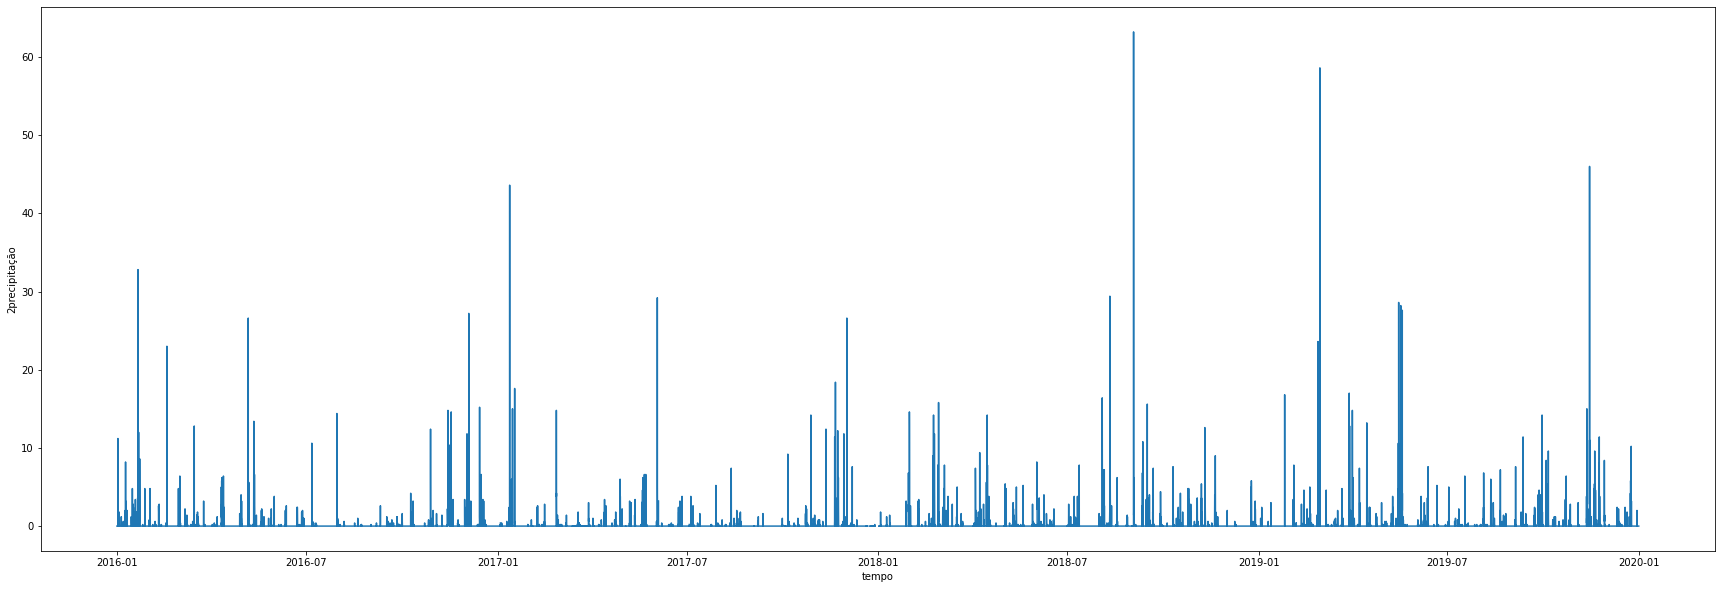

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))

sns.lineplot(
    data = base,
    x = 'tempo',
    y = '2precipitação',
    ax = ax
)

fig.show()

Da Figura 1 é possível observar a distribuição da variável preciptação total em função do tempo. Os totais de preciptação destacaram se por ter níveis mais elevados no final do ano de 2018 e início de 2019. 

In [ ]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
2precipitação,34368.0,0.140864,1.168422,0.0,0.0,0.0,0.0,63.2
3pressao,34368.0,1013.174246,4.842405,996.8,1009.7,1012.8,1016.3,1030.0
4pressão,34352.0,1013.418159,4.823355,997.2,1010.0,1013.0,1016.6,1030.1
5pressão,34352.0,1012.931576,4.854986,996.8,1009.5,1012.5,1016.1,1029.7
6radiacao,18577.0,1375.916424,1125.673193,0.0,325.1,1174.7,2286.0,4147.3
7temperatura,34366.0,23.473093,3.873527,11.6,20.8,23.2,25.8,39.9
8temperatura,34365.0,19.429230,2.772804,7.8,17.6,19.8,21.6,26.4
9temperatura,34350.0,24.028483,4.075118,12.0,21.2,23.7,26.5,40.2
10temperatura,34350.0,22.956737,3.674333,11.4,20.5,22.8,25.1,38.4
11temperatura,34349.0,19.864960,2.753474,8.6,18.0,20.2,22.0,26.6


In [ ]:
base.apply(lambda x: x.notna().value_counts(normalize = True), axis = 0).T

,False,True
0data,NaN,1.000000
1hora,NaN,1.000000
2precipitação,0.019849,0.980151
3pressao,0.019849,0.980151
4pressão,0.020306,0.979694
5pressão,0.020306,0.979694
6radiacao,0.470197,0.529803
7temperatura,0.019906,0.980094
8temperatura,0.019935,0.980065
9temperatura,0.020363,0.979637


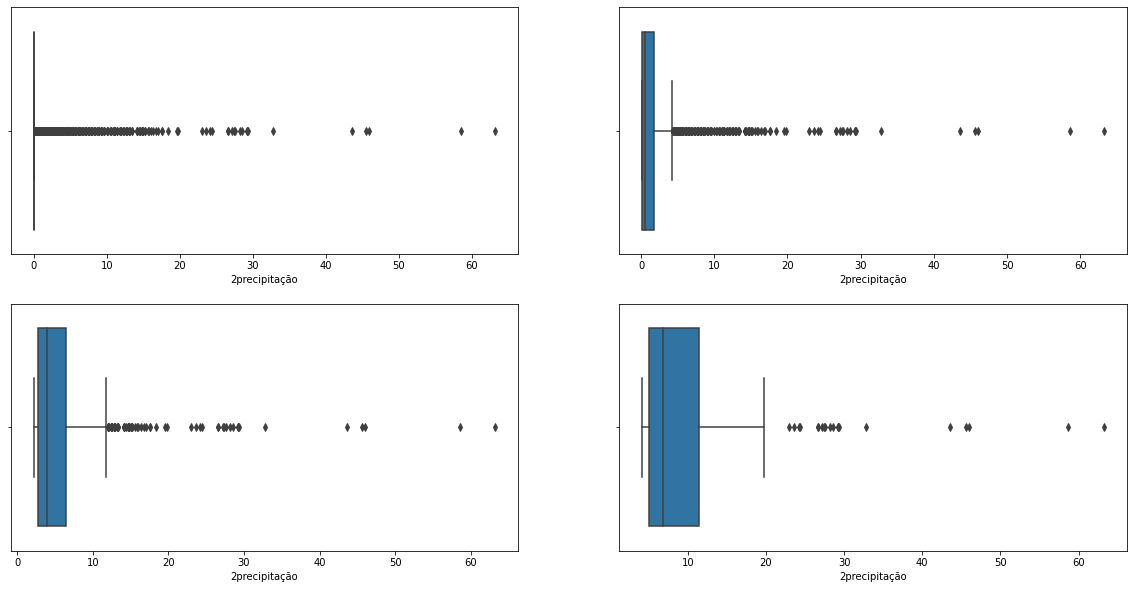

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (20,10))

sns.boxplot(
    data = base,
    x = '2precipitação',
    ax = ax[0, 0]
)

sns.boxplot(
    data = base[base['2precipitação'] > 0],
    x = '2precipitação',
    ax = ax[0, 1]
)

sns.boxplot(
    data = base[base['2precipitação'] > 2],
    x = '2precipitação',
    ax = ax[1, 0]
)

sns.boxplot(
    data = base[base['2precipitação'] > 4],
    x = '2precipitação',
    ax = ax[1, 1]
)


fig.show()

In [ ]:
tab_precip = pd.concat([
  base['2precipitação'].describe(),
  base[base['2precipitação'] <= 0]['2precipitação'].describe(),
  base[base['2precipitação'] > 0]['2precipitação'].describe(),
  base[base['2precipitação'] > 1]['2precipitação'].describe(),
  base[base['2precipitação'] > 2]['2precipitação'].describe(),
  base[base['2precipitação'] > 4]['2precipitação'].describe()], 
  axis = 1)

tab_precip.columns = [
  'Geral',
  'Menor ou igual a zero',
  'Maior que 0',
  'Maior que 1',
  'Maior que 2',
  'Maior que 4'
]
tab_precip

,Geral,Menor ou igual a zero,Maior que 0,Maior que 1,Maior que 2,Maior que 4
count,34368.000000,31707.0,2661.000000,988.000000,585.000000,272.000000
mean,0.140864,0.0,1.819316,4.214777,6.067009,9.683824
std,1.168422,0.0,3.818850,5.482083,6.505037,8.140285
min,0.000000,0.0,0.200000,1.200000,2.200000,4.200000
25%,0.000000,0.0,0.200000,1.600000,2.800000,5.000000
50%,0.000000,0.0,0.600000,2.400000,4.000000,6.800000
75%,0.000000,0.0,1.800000,4.400000,6.400000,11.400000
max,63.200000,0.0,63.200000,63.200000,63.200000,63.200000


In [ ]:
# Convert to radians.
base['16vento,'] = base['16vento,']*np.pi / 180

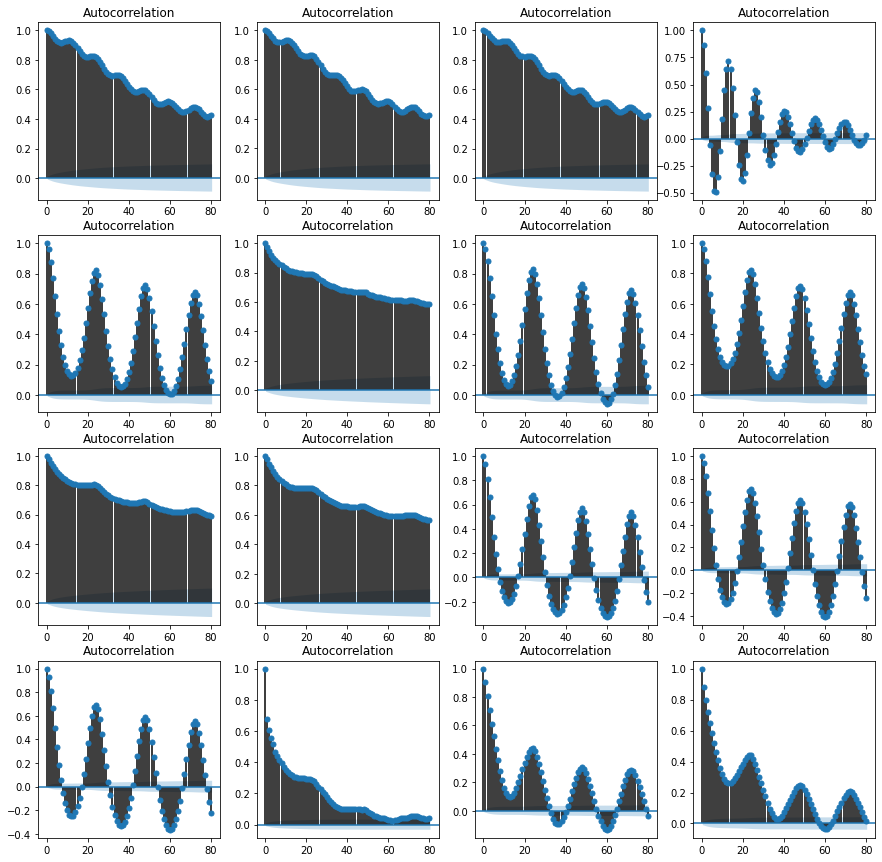

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (15,15))

contador = 3
for linha in range(4):
  for coluna in range(4):
    sele = base.iloc[:,contador].notna()
    tsaplots.plot_acf(
        base.loc[sele, base.columns[contador]],
        lags = 80,
        ax = ax[linha,coluna]
    )
    contador += 1

fig.show()


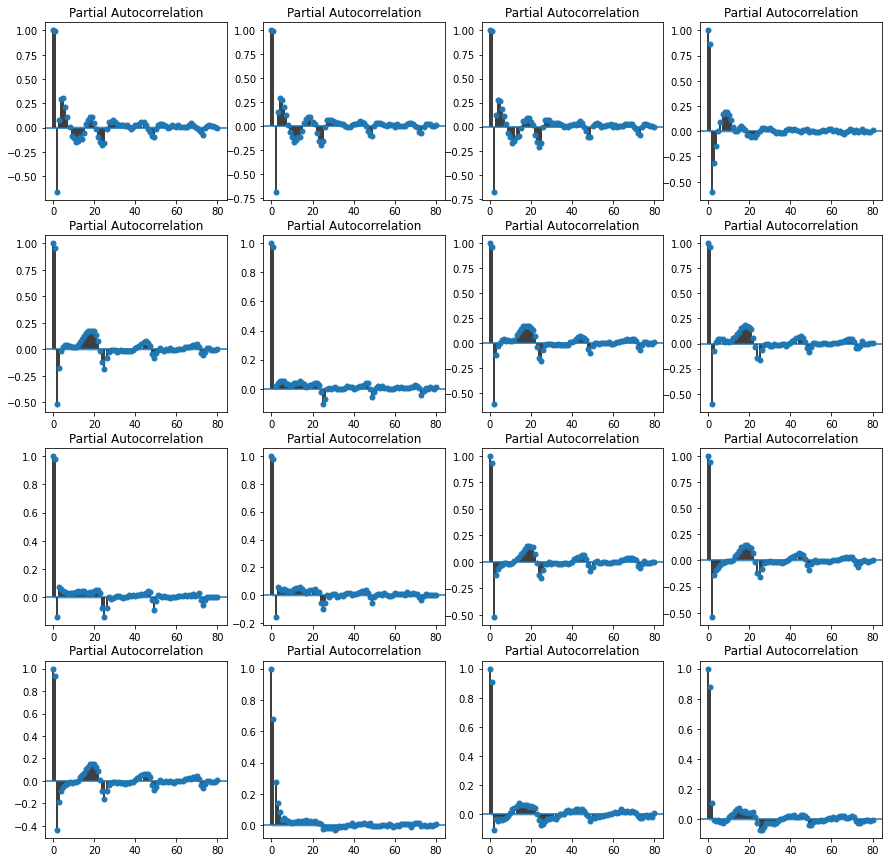

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (15,15))

contador = 3
for linha in range(4):
  for coluna in range(4):
    sele = base.iloc[:,contador].notna()
    tsaplots.plot_pacf(
        base.loc[sele, base.columns[contador]],
        lags = 80,
        ax = ax[linha,coluna]
    )
    contador += 1

fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


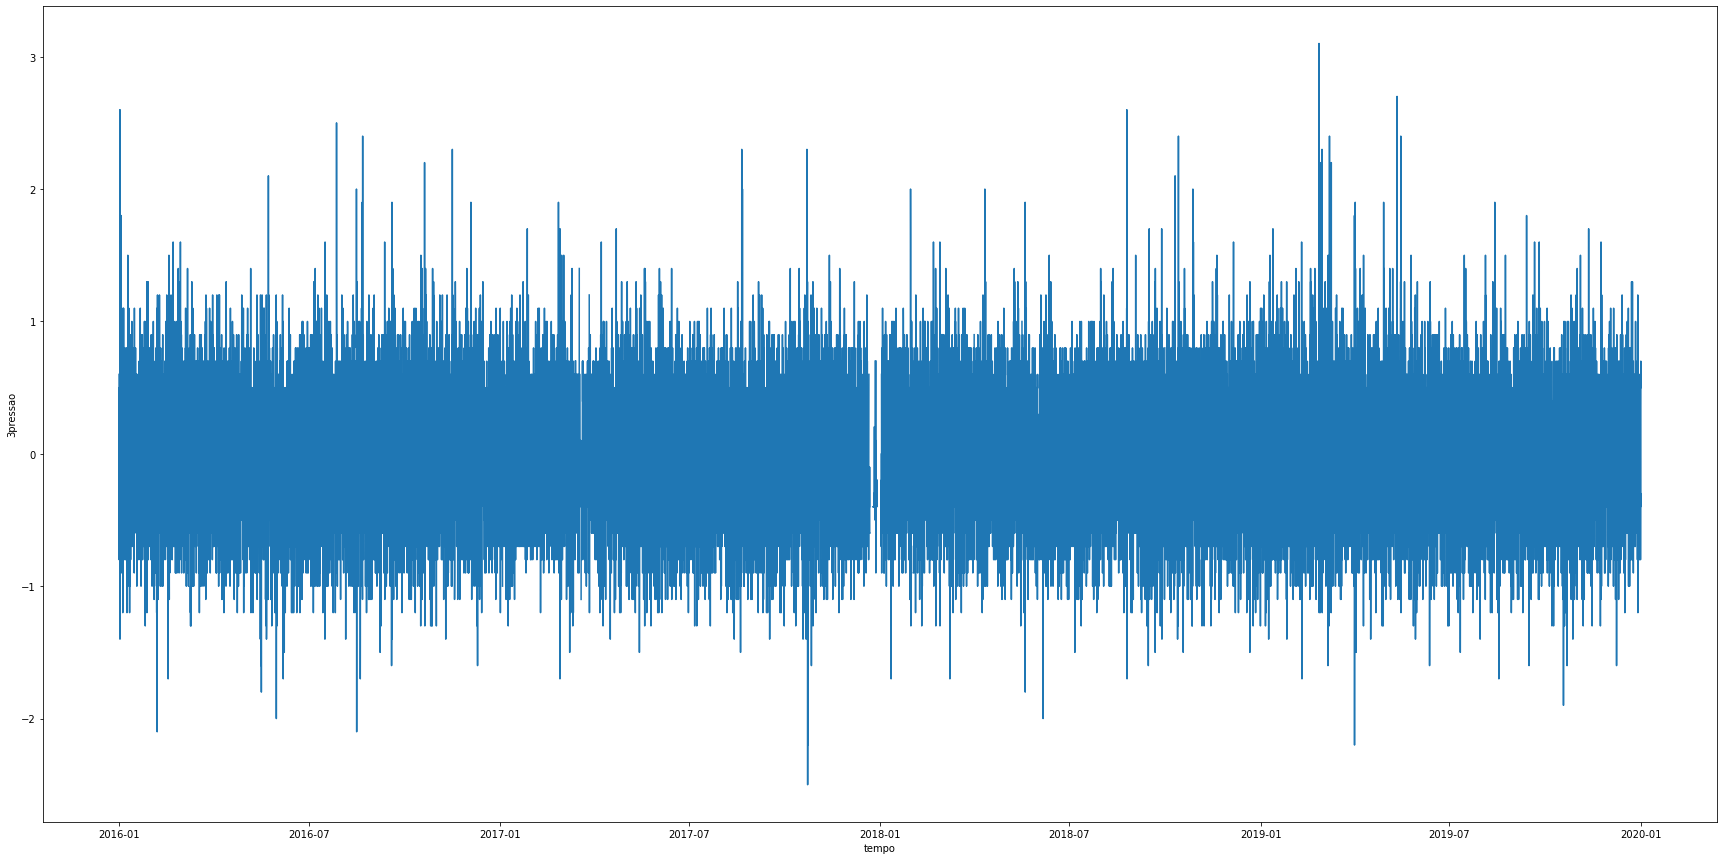

In [ ]:
fig, ax = plt.subplots(figsize = (30,15))

tab = base[['tempo','3pressao']]
tab['3pressao'] = tab['3pressao'].diff()

sns.lineplot(
    data = tab,
    x = 'tempo',
    y = '3pressao',
    ax = ax
)

fig.show()

A pressão atmosférica é um dos fatores que determinam as condições do tempo. Na atmosfera, a baixa pressão do ar é associada com a formação de muitas nuvens, com chuva e eventualmente com tempo severo, com tempestades. Enquanto as zonas de alta pressão propiciam a descida do ar, impedindo a formação de nuvens e deixando o tempo mais “limpo”. Através da Figura acima é possível verificar que entre janeiro de 2016 e janeiro de 2020 a pressão atmosférica obteve valores concentrados entre -1 e 1 milibares, típico de altitudes a nível do mar(0).

In [ ]:
# Função útil autocv
def autocov(serie, lag):
  saida = serie
  mis = np.argwhere(np.isnan(serie))
  while sum(np.isnan(saida)) != 0:
    for id, m in enumerate(mis):
      valores = saida[range(mis[id][0] - lag, mis[id][0])]
      numerador = mis[id][0] - range(mis[id][0] - lag, mis[id][0])
      numerador = np.flip(list(numerador))
      denominador = np.nansum(numerador)

      ponderacao = np.nansum((valores*numerador)/denominador)
      saida[m] = ponderacao

  return saida

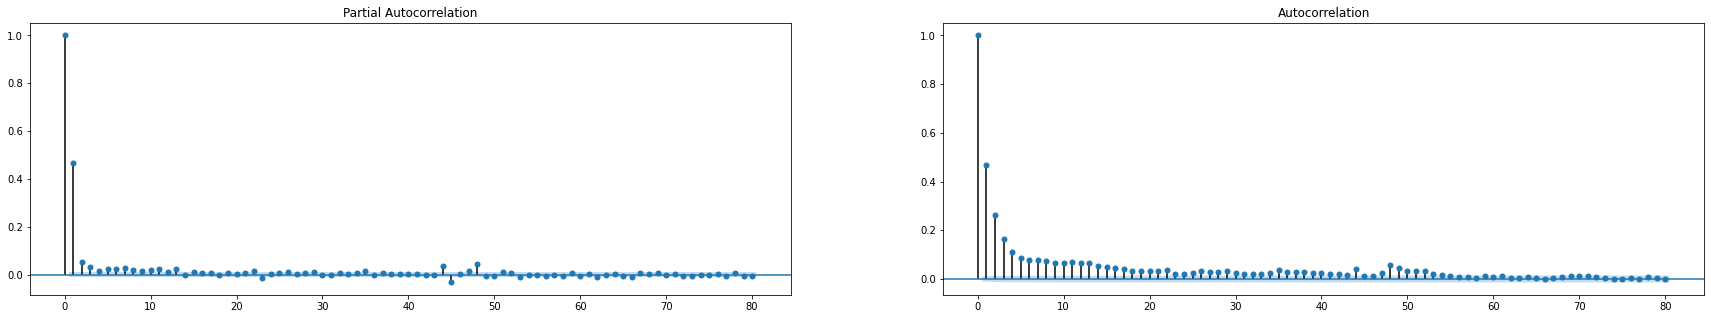

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30,5))

tsaplots.plot_pacf(
    base['2precipitação'][base['2precipitação'].notna()],
    lags = 80,
    ax = ax[0]
)

tsaplots.plot_acf(
    base['2precipitação'][base['2precipitação'].notna()],
    lags = 80,
    ax = ax[1]
)

fig.show()

In [ ]:
for col in base.drop(['0data','1hora', 'tempo'],axis = 1).columns:
  if (col == '2precipitação'):
    base[col] = autocov(base[col].values, 4)
  else:
    base[col] = autocov(base[col].values, 20)

In [ ]:
# Calculate the wind x and y components.
base['xmax'] = base['17vento,']*np.cos(base['16vento,'])
base['ymax'] = base['17vento,']*np.sin(base['16vento,'])

base['xmedio'] = base['18vento,']*np.cos(base['16vento,'])
base['ymedio'] = base['18vento,']*np.sin(base['16vento,'])

In [ ]:
day = 24*60*60
year = (365.2425)*day

base['Day sin'] = np.sin(base['tempo'].map(datetime.datetime.timestamp) * (2 * np.pi / day))
base['Day cos'] = np.cos(base['tempo'].map(datetime.datetime.timestamp) * (2 * np.pi / day))
base['Year sin'] = np.sin(base['tempo'].map(datetime.datetime.timestamp) * (2 * np.pi / year))
base['Year cos'] = np.cos(base['tempo'].map(datetime.datetime.timestamp) * (2 * np.pi / year))

In [ ]:
base2 = base.groupby('0data', as_index = False).mean().drop('2precipitação', axis = 1)
base3 = base[['2precipitação', '0data']].groupby('0data', as_index = False).sum()

base = base2.merge(base3, on = '0data', how = 'left')



base['0data'] = pd.to_datetime(base['0data'])
base = base.sort_values(by = '0data').reset_index(drop=True)

ver(base)

,0data,3pressao,4pressão,5pressão,6radiacao,7temperatura,8temperatura,9temperatura,10temperatura,11temperatura,12temperatura,13umidade,14umidade,15umidade,"16vento,","17vento,","18vento,",xmax,ymax,xmedio,ymedio,Day sin,Day cos,Year sin,Year cos,2precipitação
0,2016-01-01,1005.583333,1005.883333,1005.254167,1869.183741,28.558333,21.650000,29.695833,27.729167,22.262500,21.112500,73.208333,65.375000,69.750,2.875430,7.041667,2.820833,1.138085,0.120381,1.009403,0.246399,6.739748e-14,9.455399e-14,0.005576,0.999972,20.6
1,2016-01-02,1011.558333,1011.804167,1011.387500,2113.672102,27.291667,21.712500,27.954167,26.691667,22.208333,21.308333,76.625000,71.041667,73.875,0.898117,7.916667,3.975000,4.558981,6.000252,2.257807,3.030130,-8.953486e-14,7.392235e-14,0.022777,0.999728,0.0
2,2016-01-03,1014.675000,1014.866667,1014.366667,875.642736,23.104167,21.104167,23.450000,22.750000,21.495833,20.791667,90.333333,87.625000,88.875,3.745913,6.445833,1.966667,-4.869477,-3.492318,-1.459634,-1.104684,-3.720103e-13,-1.841120e-15,0.039971,0.999189,5.6
1458,2019-12-29,1011.754167,1012.012500,1011.537500,2071.466665,25.270833,21.529167,25.762500,24.812500,22.129167,21.095833,83.333333,78.291667,80.625,1.287908,5.687500,2.491667,0.337354,4.886237,0.218860,2.142241,-2.465366e-13,9.448461e-14,-0.045499,0.998952,0.0
1459,2019-12-30,1009.425000,1009.666667,1009.275000,2036.322106,25.154167,21.737500,25.712500,24.670833,22.450000,21.262500,84.916667,79.708333,82.125,2.052216,5.391667,2.345833,0.527589,4.218122,0.177274,1.882972,3.704768e-13,-4.305075e-13,-0.028309,0.999587,2.4
1460,2019-12-31,1008.091667,1008.325000,1007.916667,2107.617200,25.779167,21.725000,26.258333,25.291667,22.166667,21.437500,81.666667,76.916667,79.125,0.988293,7.329167,3.733333,2.915037,6.102425,1.540923,3.077881,-8.950942e-14,7.384833e-14,-0.011110,0.999926,0.0


In [ ]:
base['2precipitação'].value_counts(normalize = True, dropna = True)

0.0     0.623546
0.2     0.056810
0.4     0.030116
0.8     0.016427
0.6     0.011636
          ...   
36.6    0.000684
26.8    0.000684
8.6     0.000684
63.8    0.000684
65.6    0.000684
Name: 2precipitação, Length: 210, dtype: float64

In [ ]:
base['chuva'] = base['2precipitação'].apply(lambda x: 1 if x > 0 else 0 )
base['chuva'].value_counts(normalize = True, dropna = True)

0    0.623546
1    0.376454
Name: chuva, dtype: float64

In [ ]:
df = base.drop(['2precipitação','0data', '16vento,', '17vento,', '18vento,'], axis = 1)
# tempo = base['tempo']
ver(df)

,3pressao,4pressão,5pressão,6radiacao,7temperatura,8temperatura,9temperatura,10temperatura,11temperatura,12temperatura,13umidade,14umidade,15umidade,xmax,ymax,xmedio,ymedio,Day sin,Day cos,Year sin,Year cos,chuva
0,1005.583333,1005.883333,1005.254167,1869.183741,28.558333,21.650000,29.695833,27.729167,22.262500,21.112500,73.208333,65.375000,69.750,1.138085,0.120381,1.009403,0.246399,6.739748e-14,9.455399e-14,0.005576,0.999972,1
1,1011.558333,1011.804167,1011.387500,2113.672102,27.291667,21.712500,27.954167,26.691667,22.208333,21.308333,76.625000,71.041667,73.875,4.558981,6.000252,2.257807,3.030130,-8.953486e-14,7.392235e-14,0.022777,0.999728,0
2,1014.675000,1014.866667,1014.366667,875.642736,23.104167,21.104167,23.450000,22.750000,21.495833,20.791667,90.333333,87.625000,88.875,-4.869477,-3.492318,-1.459634,-1.104684,-3.720103e-13,-1.841120e-15,0.039971,0.999189,1
1458,1011.754167,1012.012500,1011.537500,2071.466665,25.270833,21.529167,25.762500,24.812500,22.129167,21.095833,83.333333,78.291667,80.625,0.337354,4.886237,0.218860,2.142241,-2.465366e-13,9.448461e-14,-0.045499,0.998952,0
1459,1009.425000,1009.666667,1009.275000,2036.322106,25.154167,21.737500,25.712500,24.670833,22.450000,21.262500,84.916667,79.708333,82.125,0.527589,4.218122,0.177274,1.882972,3.704768e-13,-4.305075e-13,-0.028309,0.999587,1
1460,1008.091667,1008.325000,1007.916667,2107.617200,25.779167,21.725000,26.258333,25.291667,22.166667,21.437500,81.666667,76.916667,79.125,2.915037,6.102425,1.540923,3.077881,-8.950942e-14,7.384833e-14,-0.011110,0.999926,0


In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]


In [ ]:
train_mean = train_df.drop(['chuva'], axis = 1).mean()
train_std = train_df.drop(['chuva'], axis = 1).std()

train_df.loc[:,df.columns.difference(['chuva'])] = (train_df - train_mean) / train_std
val_df.loc[:,df.columns.difference(['chuva'])] = (val_df - train_mean) / train_std
test_df.loc[:,df.columns.difference(['chuva'])] = (test_df - train_mean) / train_std

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
entrada = round(train_df.shape[0]*0.30)
saida = entrada * 2
wide_window = WindowGenerator(
    input_width=entrada, label_width=entrada, shift=30,
    label_columns=['chuva'])
print(wide_window,'\n' ,entrada, saida)

Total window size: 337
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
jane = wide_window.total_window_size
example_window = tf.stack([np.array(train_df[:jane]),
                           np.array(train_df[entrada:(entrada + jane)]),
                           np.array(train_df[(entrada + jane):(entrada + jane + jane)])])


example_inputs, example_labels = wide_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 337, 22)
Inputs shape: (3, 307, 22)
labels shape: (3, 307, 1)


In [ ]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
wide_window.example = example_inputs, example_labels

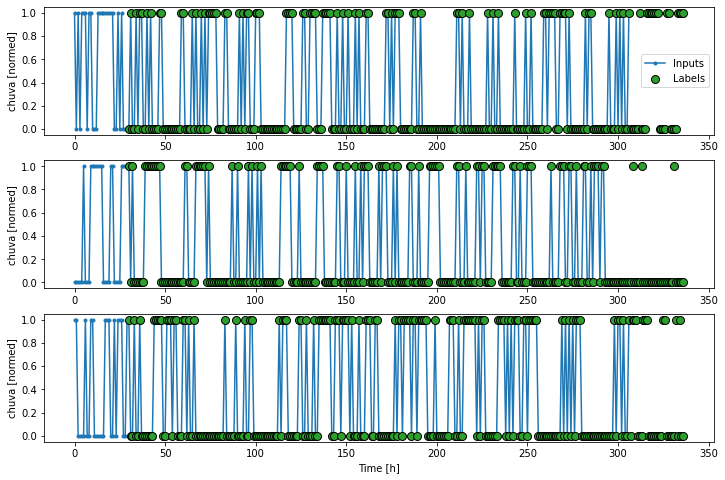

In [ ]:
wide_window.plot(plot_col='chuva')

In [ ]:
df['chuva'].value_counts(normalize = True)

0    0.623546
1    0.376454
Name: chuva, dtype: float64

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 307, 22)
Labels shape (batch, time, features): (32, 307, 1)


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['chuva'])

baseline.compile(loss='binary_crossentropy',
                 metrics=['accuracy'])

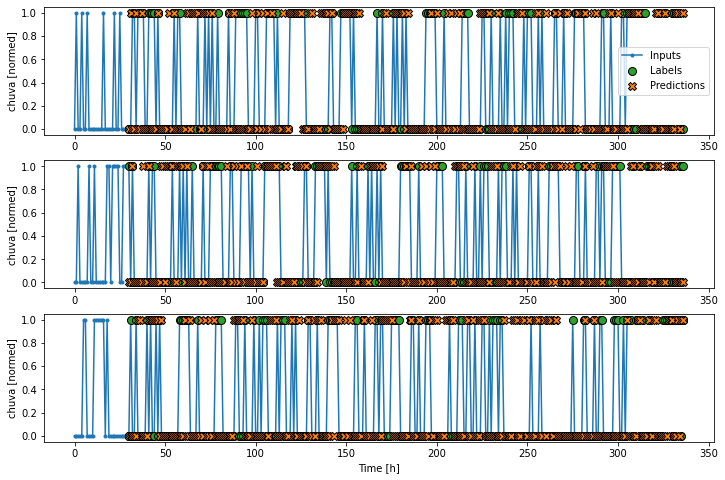

In [ ]:
wide_window.plot(baseline, plot_col='chuva')

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import Adam 

MAX_EPOCHS = 100
opt = Adam(learning_rate = 0.01)
def compile_and_fit(opt, model, window, patience=2, 
                    loss = 'binary_crossentropy', metrics = ['accuracy']):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  
  model.compile(loss=loss, optimizer=opt, metrics= metrics)

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(44, input_dim = 22, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'), 
])

In [ ]:
history = compile_and_fit(model = modelo, window = wide_window, opt = opt)

Epoch 1/100
22/22 [==============================] - 0s 10ms/step - loss: 0.6316 - accuracy: 0.6570
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.6133 - accuracy: 0.6629
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5714 - accuracy: 0.7178
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4704 - accuracy: 0.7974
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.3473 - accuracy: 0.8743
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 0.2496 - accuracy: 0.9243
Epoch 7/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1859 - accuracy: 0.9500
Epoch 8/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1398 - accuracy: 0.9686
Epoch 9/100
22/22 [==============================] - 0s 11ms/step - loss: 0.1078 - accuracy: 0.9794
Epoch 10/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0850 - accuracy: 0.9859

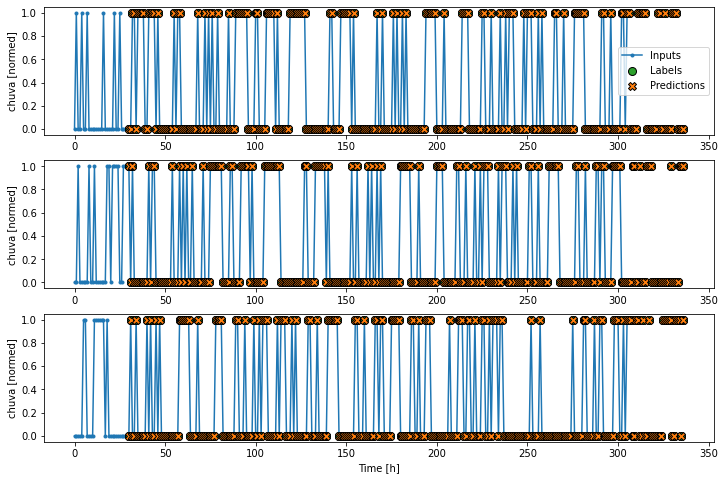

In [ ]:
wide_window.plot(modelo, plot_col='chuva')

In [ ]:
# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(wide_window.val)
# performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

wide_window

Total window size: 337
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [ ]:
val_performance['Linear'] = modelo.evaluate(wide_window.val)
performance['Linear'] = modelo.evaluate(wide_window.test, verbose=0)

In [ ]:
val_performance

In [ ]:
performance
